# DSA - B3 Project_Competition

### Abstract :
Air pollution has become an important environmental issue nowadays. WHO data shows that almost all of the global population (99%) breathe air that exceeds WHO guideline limits containing high levels of pollutants, with low- and middle-income countries suffering from the highest exposures. It kills an estimated seven million people worldwide every year. 
Pollutants of major public health concern includes particulate matter, carbon monoxide, ozone, nitrogen dioxide and sulfur dioxide. So proper monitoring is to be checked whether the concentration of these exceeds the maximum tolerable level.
For that AQI(Air quality index) is used by government agencies to communicate with the public how polluted the air currently is or how polluted it is forecast to become.
Computation of the AQI requires an air pollutant concentration over a specified averaging period, obtained from an air monitor or model.
In this work we are doing inferential modelling on the data with AQI as target and air pollutants as features. 

#### Domain : Environmental pollution

#### Dataset :
#### The Air quality index data of South Indian States from 2015 to 2020 based on concentration of air pollutants.

#### Features :  
- PM2.5 :Fine particulate matter with 2.5 micrometers or less in diameter
- PM10  : particulate matter in the air with a diameter of 10 micrometers or less, including smoke, dust, soot, salts, acids, and metals.
- NO    : Nitric Oxide
- NO2   : Nitrogen Dioxide
- NOx   : other Nitrogen Oxides
- NH3   : Ammonia
- CO    : Carbon Monoxide
- SO2   : Sulphur Dioxide
- O3    : Ozone
- AQI   : Air Quality Index
    
#### Cities under study :
  Bengaluru, Chennai, Thiruvananthapuram, Coimbatore, Ernakulam.
  
#### Regression models: Random forest regressor, Support vector machine, Linear regression, Decision tree

  ##### Ref: kaggle data

In [1]:
#importing modules
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading and displaying dataset in python environment.
aqi=pd.read_csv("final.csv")
aqi.head()

,Unnamed: 0,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,0,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,NaN
1,1,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,NaN
2,2,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,NaN
3,3,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,NaN
4,4,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,NaN


In [3]:
#dropping unwanted column
aqi = aqi.drop(["Unnamed: 0"],axis=1)
aqi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Bengaluru,2015-01-01,NaN,NaN,3.26,17.33,10.88,20.36,0.33,3.54,10.73,NaN
1,Bengaluru,2015-01-02,NaN,NaN,6.05,19.73,14.14,23.74,1.35,3.97,22.77,NaN
2,Bengaluru,2015-01-03,NaN,NaN,11.91,19.88,20.72,4.32,17.40,13.61,12.03,NaN
3,Bengaluru,2015-01-04,NaN,NaN,7.45,21.61,16.88,0.87,5.05,6.52,17.70,NaN
4,Bengaluru,2015-01-05,NaN,NaN,9.52,22.17,21.76,31.38,1.83,4.71,12.72,NaN


In [4]:
aqi.shape

(5678, 12)

Now the Dataset contains a total of 5678 rows and 12 columns.

In [5]:
aqi.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'AQI'],
      dtype='object')

In [6]:
#extracting basic informations
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678 entries, 0 to 5677
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    5678 non-null   object 
 1   Date    5678 non-null   object 
 2   PM2.5   5361 non-null   float64
 3   PM10    3562 non-null   float64
 4   NO      5546 non-null   float64
 5   NO2     5539 non-null   float64
 6   NOx     5614 non-null   float64
 7   NH3     4773 non-null   float64
 8   CO      5619 non-null   float64
 9   SO2     5598 non-null   float64
 10  O3      5289 non-null   float64
 11  AQI     5343 non-null   float64
dtypes: float64(10), object(2)
memory usage: 532.4+ KB


In [7]:
#renaming column 'PM2.5' to 'PM2_5'
aqi.rename(columns={'PM2.5': 'PM2_5'}, inplace=True)
aqi.head(0)

,City,Date,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI


In [8]:
#extracting statistical informations
aqi.describe()

,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,5361.000000,3562.000000,5546.000000,5539.000000,5614.000000,4773.000000,5619.000000,5598.000000,5289.000000,5343.000000
mean,38.630358,65.988770,8.441973,19.979590,17.633564,31.152198,1.326697,6.521726,32.789300,96.377690
std,24.198817,37.273798,9.216053,13.473147,13.917681,40.957546,2.547852,4.464872,16.648728,44.127915
min,1.720000,0.210000,0.060000,0.060000,0.000000,0.010000,0.000000,0.410000,1.800000,20.000000
25%,21.950000,39.415000,3.750000,10.725000,8.102500,7.080000,0.680000,3.990000,20.050000,67.000000
50%,33.990000,58.245000,6.850000,16.820000,15.760000,18.550000,0.900000,5.660000,30.740000,85.000000
75%,49.450000,84.972500,10.070000,26.590000,23.787500,35.720000,1.170000,7.680000,43.440000,112.000000
max,313.590000,351.510000,152.120000,142.350000,156.210000,352.890000,48.070000,92.660000,157.200000,449.000000


#### Note: 
- The dataset contains 5678 emtries with 12 columns. Our target is AQI(air quality index) and features are PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3.
- The AQI of 5 cities are studied based on periodic manner.
- There are many missing values in this dataset.
- we can see the mean AQI of 5 cities as per data is 96.377.
- Average concentration of PM10 is large compare to other pollutants.
(AQI values at or below 100 are generally thought of as satisfactory. When AQI > 100, air quality is unhealthy)


## *PREPROCESSING*

In [9]:
aqi.isna().sum()           # checking null values.

City        0
Date        0
PM2_5     317
PM10     2116
NO        132
NO2       139
NOx        64
NH3       905
CO         59
SO2        80
O3        389
AQI       335
dtype: int64

In [10]:
aqi.dtypes                 # checking datatypes.

City      object
Date      object
PM2_5    float64
PM10     float64
NO       float64
NO2      float64
NOx      float64
NH3      float64
CO       float64
SO2      float64
O3       float64
AQI      float64
dtype: object

In [11]:
## Note: There are two object datatypes and remaining columns are of float type. There are many null values in the dataset that we need to fill/drop.
## for that we are checking skewness of the variables.

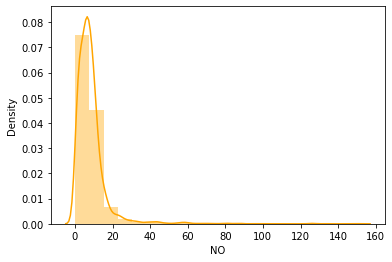

In [12]:
#plot of 'NO' concentration.
sns.distplot(aqi['NO'],kde=True,bins=20,color='orange')
plt.show()

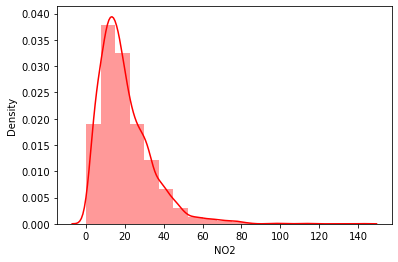

In [13]:
#NO2
sns.distplot(aqi['NO2'],kde=True,bins=19,color='red')
plt.show()

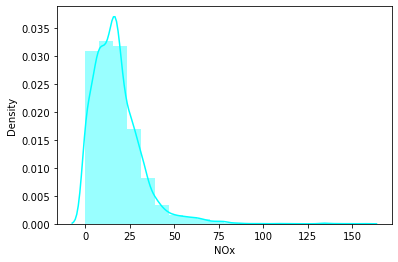

In [14]:
#NOx
sns.distplot(aqi['NOx'],kde=True,bins=20,color='cyan')
plt.show()


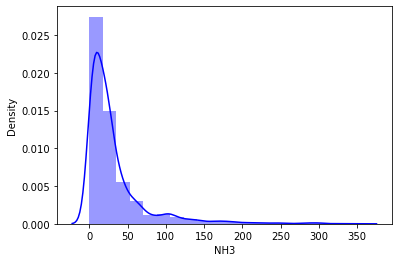

In [15]:
#NH3
sns.distplot(aqi['NH3'],kde=True,bins=20,color='blue')
plt.show()


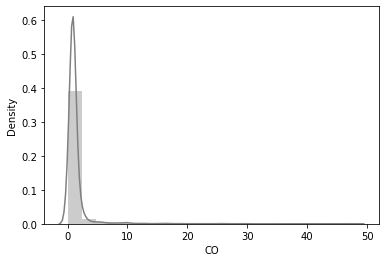

In [16]:
#CO
sns.distplot(aqi['CO'],kde=True,bins=20,color='grey')
plt.show()

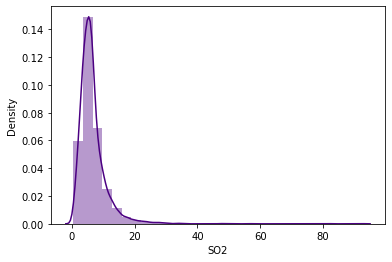

In [17]:
#SO2
sns.distplot(aqi['SO2'],kde=True,bins=30,color='INDIGO')
plt.show()


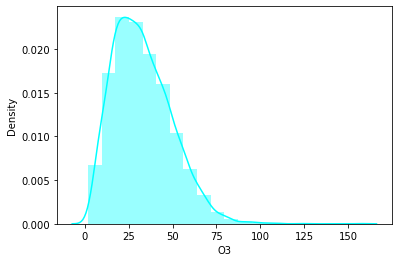

In [18]:
#O3
sns.distplot(aqi['O3'],kde=True,bins=20,color='cyan')
plt.show()

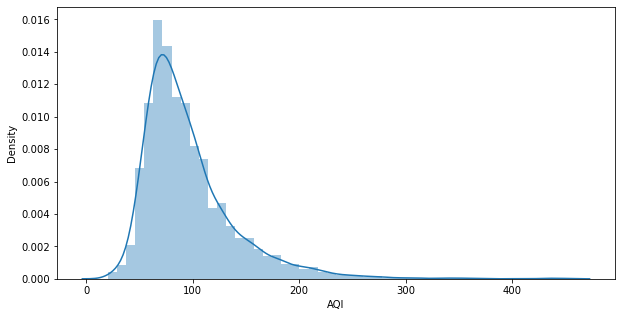

In [19]:
#AQI
fig, ax = plt.subplots(figsize=(10,5))        
sns.distplot(aqi.AQI, kde=True);

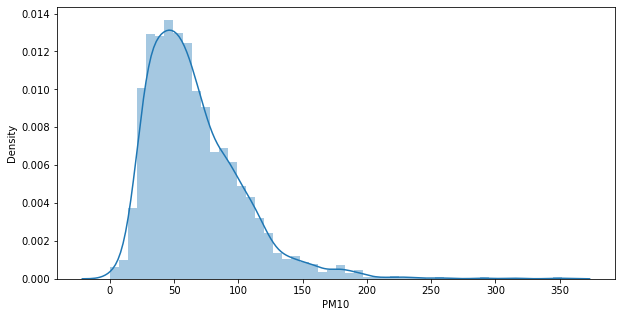

In [20]:
#PM10
fig, ax = plt.subplots(figsize=(10,5))        
sns.distplot(aqi.PM10,kde=True);

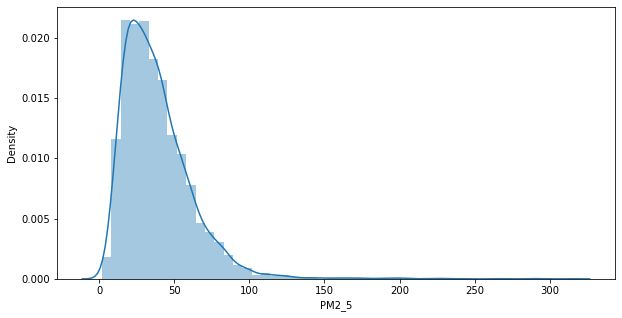

In [21]:
#PM2_5
fig, ax = plt.subplots(figsize=(10,5))        
sns.distplot(aqi.PM2_5);

#### Note: from the distribution plots it is clear that all the features are right skewed so we can use median/mode to fill missing values.

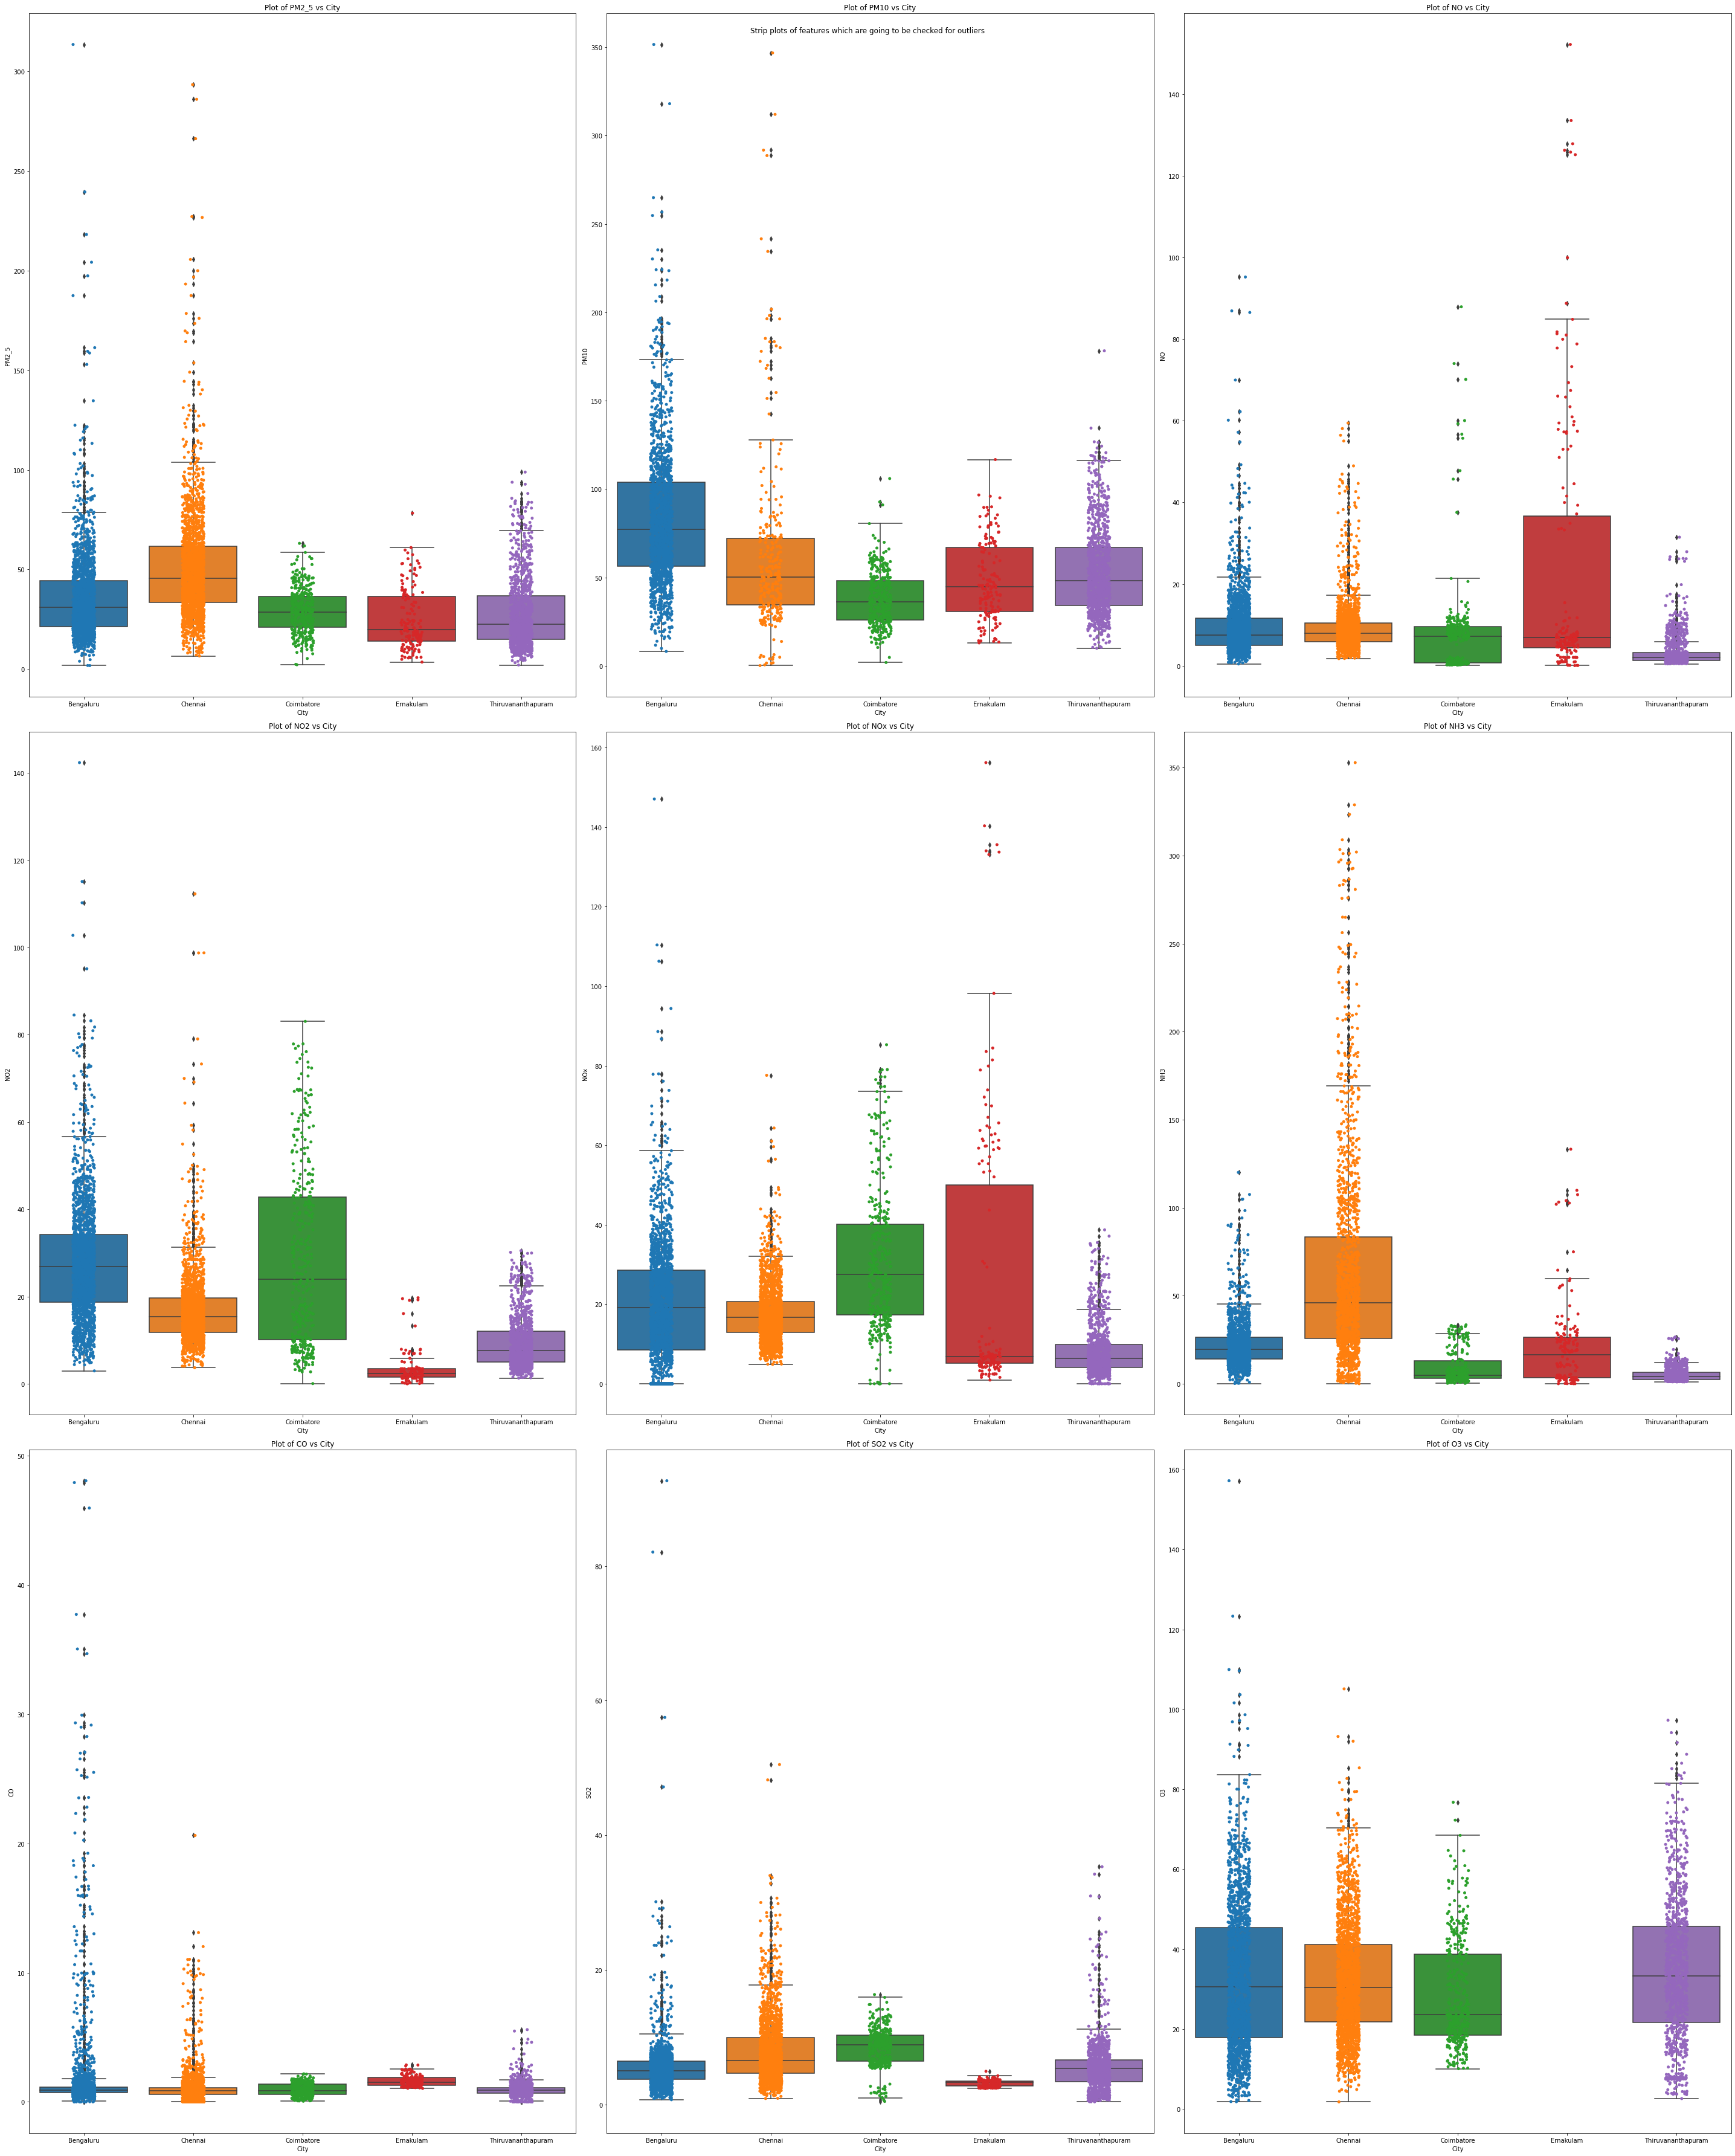

In [22]:
#fig, axes = plt.subplots(1, 3, figsize=(10, 5))
#print(fig)
fig,axes = plt.subplots(3,3, figsize=(40,50))

#plotting PM2_5 vs City
sns.stripplot(ax=axes[0,0],data=aqi,x=aqi['City'],y=aqi["PM2_5"]).set_title("Plot of PM2_5 vs City")
sns.boxplot(ax=axes[0,0],data=aqi,x=aqi['City'],y=aqi["PM2_5"]).set_title("Plot of PM2_5 vs City")

#plotting PM10 vs City
sns.stripplot(ax=axes[0,1],data=aqi,x=aqi['City'],y=aqi["PM10"]).set_title("Plot of PM10 vs City")
sns.boxplot(ax=axes[0,1],data=aqi,x=aqi['City'],y=aqi["PM10"]).set_title("Plot of PM10 vs City")

#plotting NO vs City
sns.stripplot(ax=axes[0,2],data=aqi,x=aqi['City'],y=aqi["NO"]).set_title("Plot of NO vs City")
sns.boxplot(ax=axes[0,2],data=aqi,x=aqi['City'],y=aqi["NO"]).set_title("Plot of NO vs City")

#plotting NO2 vs City
sns.stripplot(ax=axes[1,0],data=aqi,x=aqi['City'],y=aqi["NO2"]).set_title("Plot of NO2 vs City")
sns.boxplot(ax=axes[1,0],data=aqi,x=aqi['City'],y=aqi["NO2"]).set_title("Plot of NO2 vs City")

#plotting NOx vs City
sns.stripplot(ax=axes[1,1],data=aqi,x=aqi['City'],y=aqi["NOx"]).set_title("Plot of NOx vs City")
sns.boxplot(ax=axes[1,1],data=aqi,x=aqi['City'],y=aqi["NOx"]).set_title("Plot of NOx vs City")

#plotting NH3 vs City
sns.stripplot(ax=axes[1,2],data=aqi,x=aqi['City'],y=aqi["NH3"]).set_title("Plot of NH3 vs City")
sns.boxplot(ax=axes[1,2],data=aqi,x=aqi['City'],y=aqi["NH3"]).set_title("Plot of NH3 vs City")

#plotting CO vs City
sns.stripplot(ax=axes[2,0],data=aqi,x=aqi['City'],y=aqi["CO"]).set_title("Plot of CO vs City")
sns.boxplot(ax=axes[2,0],data=aqi,x=aqi['City'],y=aqi["CO"]).set_title("Plot of CO vs City")

#plotting SO2 vs City
sns.stripplot(ax=axes[2,1],data=aqi,x=aqi['City'],y=aqi["SO2"]).set_title("Plot of SO2 vs City")
sns.boxplot(ax=axes[2,1],data=aqi,x=aqi['City'],y=aqi["SO2"]).set_title("Plot of SO2 vs City")

#plotting O3 vs City
sns.stripplot(ax=axes[2,2],data=aqi,x=aqi['City'],y=aqi["O3"]).set_title("Plot of O3 vs City")
sns.boxplot(ax=axes[2,2],data=aqi,x=aqi['City'],y=aqi["O3"]).set_title("Plot of O3 vs City")


fig.suptitle("Strip plots of features which are going to be checked for outliers")
fig.tight_layout()

In [23]:
aqi[aqi["AQI"].isna()]["City"].value_counts()

Chennai               125
Bengaluru              99
Thiruvananthapuram     60
Coimbatore             42
Ernakulam               9
Name: City, dtype: int64

In [24]:
median_values= aqi.groupby('City')['PM2_5','PM10','SO2','NO','NO2','NOx','NH3','CO','O3'].median()
median_values

,PM2_5,PM10,SO2,NO,NO2,NOx,NH3,CO,O3
City,,,,,,,,,
Bengaluru,30.920,77.360,5.03,7.52,26.92,19.140,19.635,0.920,30.600
Chennai,45.545,50.245,6.54,7.97,15.44,16.680,46.060,0.855,30.475
Coimbatore,28.515,36.220,8.92,7.28,23.99,27.440,4.850,0.880,23.650
Ernakulam,19.755,44.635,3.28,6.95,2.47,6.765,16.590,1.525,NaN
Thiruvananthapuram,22.380,48.330,5.35,2.05,7.60,6.415,4.020,0.890,33.380


In [25]:
aqi = aqi[aqi['AQI'].notna()]

In [26]:

aqi["PM2_5"] = aqi["PM2_5"].fillna(aqi.groupby("City")["PM2_5"].transform('median'))
aqi["PM10"]  = aqi["PM10"].fillna(aqi.groupby("City")["PM10"].transform('median'))
aqi["NO"]    = aqi["NO"].fillna(aqi.groupby("City")["NO"].transform('median'))
aqi["NO2"]   = aqi["NO2"].fillna(aqi.groupby("City")["NO2"].transform('median'))
aqi["NOx"]   = aqi["NOx"].fillna(aqi.groupby("City")["NOx"].transform('median'))
aqi["NH3"]   = aqi["NH3"].fillna(aqi.groupby("City")["NH3"].transform('median'))
aqi["CO"]    = aqi["CO"].fillna(aqi.groupby("City")["CO"].transform('median'))
aqi["SO2"]   = aqi["SO2"].fillna(aqi.groupby("City")["SO2"].transform('median'))
aqi["O3"]    = aqi["O3"].fillna(aqi.groupby("City")["O3"].transform('median'))

In [27]:
aqi['O3'].mode()[0]

30.46

In [28]:
aqi['O3'].fillna(aqi['O3'].mode()[0], inplace=True)

In [29]:
aqi.isna().sum()

City     0
Date     0
PM2_5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

### checking for outliers

In [30]:
##CHECKING OUTLIERS FOR 'NO'

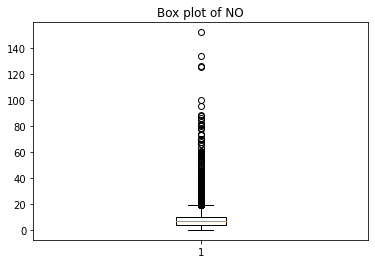

In [31]:
plt.boxplot(aqi['NO'])
plt.title('Box plot of NO')
plt.show()

In [32]:
Q1=np.percentile(aqi['NO'],25,interpolation='midpoint')
Q2=np.percentile(aqi['NO'],50,interpolation='midpoint')
Q3=np.percentile(aqi['NO'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 3.795
The Q2 value: 6.85
The Q3 value: 9.945
The values below -5.4300000000000015 and above 19.17 are outliers.


In [33]:
outlier=[]
for x in aqi["NO"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in NO feature')
print('Outliers are:',outlier)

There are 254 outliers in NO feature
Outliers are: [21.66, 25.04, 23.41, 24.29, 20.49, 22.95, 20.35, 20.86, 22.68, 20.76, 22.45, 20.87, 26.49, 24.56, 23.56, 29.68, 42.37, 46.57, 57.18, 38.5, 23.76, 35.73, 86.51, 95.19, 44.25, 43.53, 44.68, 48.29, 33.73, 24.11, 20.32, 20.4, 42.33, 19.36, 19.66, 27.61, 20.84, 26.89, 69.97, 22.08, 24.37, 39.37, 49.24, 20.35, 22.62, 21.36, 28.97, 19.79, 24.27, 54.79, 43.48, 20.75, 24.05, 24.01, 31.66, 24.71, 38.94, 28.0, 21.48, 42.05, 19.92, 27.3, 28.39, 32.78, 24.59, 28.13, 23.02, 20.04, 19.76, 19.67, 23.36, 24.08, 21.68, 23.38, 23.61, 20.8, 19.51, 22.31, 22.92, 24.38, 21.34, 25.62, 20.83, 22.69, 24.42, 24.51, 21.82, 19.25, 20.52, 20.06, 26.3, 23.91, 28.53, 21.53, 19.45, 30.58, 30.12, 23.04, 20.84, 23.55, 19.33, 26.17, 31.63, 32.73, 25.65, 40.06, 21.57, 39.83, 60.14, 22.16, 19.73, 21.59, 23.61, 29.45, 23.78, 19.87, 23.3, 23.55, 41.22, 25.8, 21.63, 26.1, 31.34, 20.78, 31.44, 26.51, 28.33, 31.23, 39.96, 22.83, 37.45, 42.23, 33.67, 23.17, 59.44, 24.69, 27.38

In [34]:
ind1 = aqi['NO'] > up_lim
NO_index=aqi.loc[ind1].index 

In [35]:
aqi.drop(NO_index,inplace=True)

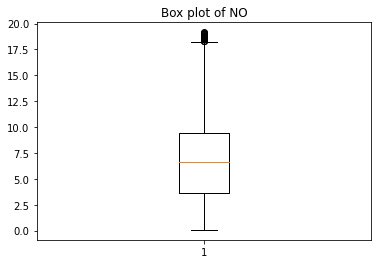

In [36]:
plt.boxplot(aqi['NO'])
plt.title('Box plot of NO')
plt.show()

In [37]:
##CHECKING OUTLIERS FOR 'CO'

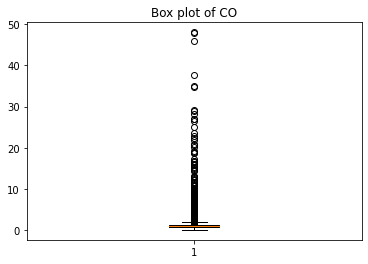

In [38]:
plt.boxplot(aqi['CO'])
plt.title('Box plot of CO')
plt.show()

In [39]:
Q1=np.percentile(aqi['CO'],25,interpolation='midpoint')
Q2=np.percentile(aqi['CO'],50,interpolation='midpoint')
Q3=np.percentile(aqi['CO'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 0.67
The Q2 value: 0.89
The Q3 value: 1.14
The values below -0.03499999999999981 and above 1.8449999999999998 are outliers.


In [40]:
outlier=[]
for x in aqi["CO"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in CO feature')
print('Outliers are:',outlier)


There are 460 outliers in CO feature
Outliers are: [3.89, 11.29, 9.95, 10.05, 2.85, 8.07, 8.53, 9.6, 4.06, 5.34, 9.58, 2.3, 6.84, 5.82, 5.19, 2.65, 2.23, 5.45, 12.93, 3.84, 4.58, 6.14, 3.65, 3.1, 2.31, 4.44, 4.17, 28.28, 4.82, 23.56, 2.57, 2.06, 12.23, 12.77, 10.68, 17.21, 9.13, 4.19, 4.21, 4.79, 4.52, 2.84, 5.65, 4.45, 3.93, 1.96, 1.89, 3.21, 2.36, 3.74, 2.0, 2.89, 3.84, 4.29, 2.08, 5.48, 2.83, 15.98, 2.03, 5.28, 5.01, 6.96, 2.58, 7.52, 15.9, 20.81, 26.99, 2.86, 7.24, 3.42, 15.1, 2.42, 2.11, 27.06, 10.62, 9.91, 3.56, 18.69, 12.18, 9.82, 9.35, 16.7, 9.44, 16.46, 2.89, 2.42, 14.36, 12.51, 1.86, 9.97, 37.73, 25.13, 9.92, 48.07, 3.15, 20.25, 8.78, 29.0, 29.16, 34.69, 35.05, 16.67, 9.03, 14.55, 21.83, 9.91, 11.68, 26.54, 4.29, 2.4, 1.96, 9.97, 2.76, 5.77, 5.26, 22.81, 9.83, 13.22, 3.19, 22.32, 19.24, 18.85, 18.66, 8.24, 2.15, 2.21, 2.13, 2.39, 3.05, 2.68, 2.26, 2.09, 2.71, 1.95, 2.21, 1.96, 2.66, 3.38, 2.5, 2.12, 6.11, 3.03, 3.91, 8.22, 3.63, 2.63, 3.56, 2.09, 1.99, 2.48, 2.18, 2.3, 2.03, 

In [41]:
ind1 = aqi['CO'] > up_lim
CO_index=aqi.loc[ind1].index 

In [42]:
aqi.drop(CO_index,inplace=True)

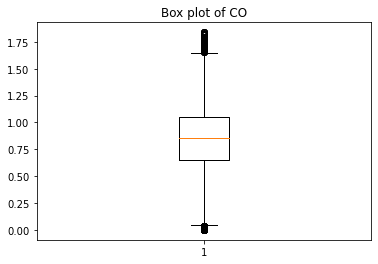

In [43]:
plt.boxplot(aqi['CO'])
plt.title('Box plot of CO')
plt.show()

In [44]:
##CHECKING FOR OUTLIERS IN 'NO2'

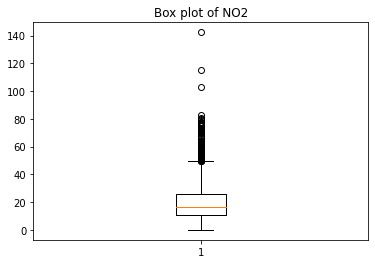

In [45]:
plt.boxplot(aqi['NO2'])
plt.title('Box plot of NO2')
plt.show()

In [46]:
Q1=np.percentile(aqi['NO2'],25,interpolation='midpoint')
Q2=np.percentile(aqi['NO2'],50,interpolation='midpoint')
Q3=np.percentile(aqi['NO2'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 10.58
The Q2 value: 16.5
The Q3 value: 26.15
The values below -12.774999999999997 and above 49.504999999999995 are outliers.


In [47]:
outlier=[]
for x in aqi["NO2"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in NO2 feature')
print('Outliers are:',outlier)

There are 100 outliers in NO2 feature
Outliers are: [71.63, 57.62, 53.53, 51.22, 51.73, 77.07, 55.91, 70.58, 50.76, 51.13, 55.92, 49.76, 49.77, 56.54, 59.53, 62.46, 52.29, 59.8, 72.51, 79.24, 52.33, 67.51, 76.4, 67.63, 51.47, 57.48, 64.96, 70.5, 70.87, 80.24, 102.78, 75.14, 51.89, 49.76, 51.16, 50.65, 50.06, 57.89, 63.33, 50.27, 80.93, 115.11, 142.35, 61.7, 50.19, 52.5, 51.77, 53.65, 52.68, 53.48, 54.43, 70.0, 61.67, 57.52, 54.12, 58.36, 52.78, 56.59, 76.87, 67.22, 60.29, 61.69, 67.32, 58.28, 58.35, 51.57, 62.1, 83.07, 66.14, 55.45, 56.73, 53.17, 72.38, 61.93, 58.79, 52.79, 59.11, 64.4, 60.94, 62.23, 72.56, 77.9, 75.48, 76.13, 73.74, 77.42, 69.98, 74.56, 71.08, 67.03, 70.55, 54.71, 51.12, 53.47, 53.72, 57.03, 50.9, 50.96, 50.45, 53.12]


In [48]:
ind1 = aqi['NO2'] > up_lim
NO2_index=aqi.loc[ind1].index

In [49]:
aqi.drop(NO2_index,inplace=True)

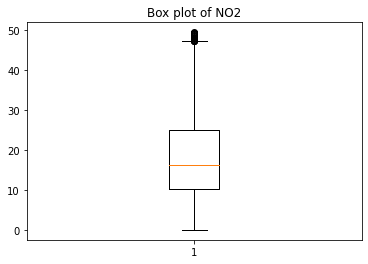

In [50]:
plt.boxplot(aqi['NO2'])
plt.title('Box plot of NO2')
plt.show()

In [51]:
##CHECKING OUTLIERS IN NOx

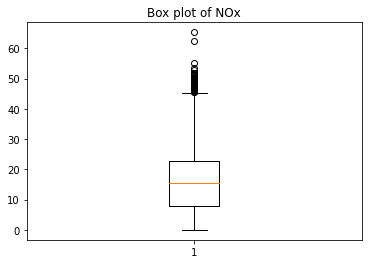

In [52]:
plt.boxplot(aqi['NOx'])
plt.title('Box plot of NOx')
plt.show()

In [53]:
Q1=np.percentile(aqi['NOx'],25,interpolation='midpoint')
Q2=np.percentile(aqi['NOx'],50,interpolation='midpoint')
Q3=np.percentile(aqi['NOx'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 7.99
The Q2 value: 15.5
The Q3 value: 22.93
The values below -14.42 and above 45.34 are outliers.


In [54]:
outlier=[]
for x in aqi["NOx"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in NOx feature')
print('Outliers are:',outlier)

There are 42 outliers in NOx feature
Outliers are: [65.31, 47.53, 50.52, 62.33, 47.05, 49.37, 51.07, 55.02, 47.59, 46.02, 51.24, 47.93, 46.05, 47.55, 51.87, 50.21, 48.97, 51.67, 50.62, 48.49, 48.92, 48.8, 46.61, 45.48, 48.69, 51.72, 52.79, 47.34, 49.87, 48.99, 46.01, 53.47, 49.0, 45.43, 46.29, 46.56, 47.84, 46.9, 48.32, 45.8, 48.74, 45.75]


In [55]:
ind1 = aqi['NOx'] > up_lim
NOx_index=aqi.loc[ind1].index

In [56]:
aqi.drop(NOx_index,inplace=True)

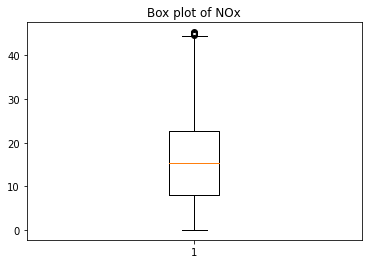

In [57]:
plt.boxplot(aqi['NOx'])
plt.title('Box plot of NOx')
plt.show()

In [58]:
##CHECKING OUTLIERS IN 'SO2'

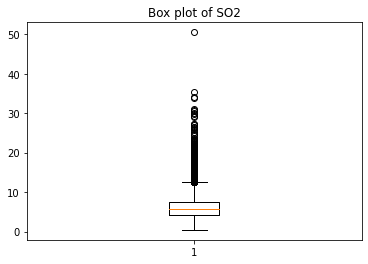

In [59]:
plt.boxplot(aqi['SO2'])
plt.title('Box plot of SO2')
plt.show()

In [60]:
Q1=np.percentile(aqi['SO2'],25,interpolation='midpoint')
Q2=np.percentile(aqi['SO2'],50,interpolation='midpoint')
Q3=np.percentile(aqi['SO2'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 4.08
The Q2 value: 5.6
The Q3 value: 7.43
The values below -0.9449999999999994 and above 12.454999999999998 are outliers.


In [61]:
outlier=[]
for x in aqi["SO2"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in SO2 feature')
print('Outliers are:',outlier)

There are 292 outliers in SO2 feature
Outliers are: [29.11, 26.42, 15.91, 18.89, 15.06, 12.82, 15.38, 16.6, 12.74, 13.04, 13.46, 14.55, 14.62, 16.07, 16.03, 22.46, 19.41, 12.69, 12.74, 13.1, 12.76, 15.0, 14.04, 12.82, 13.55, 13.4, 14.34, 13.06, 14.31, 14.9, 14.02, 15.72, 12.8, 14.18, 12.68, 16.69, 12.86, 13.31, 12.52, 13.63, 15.6, 13.03, 16.0, 26.16, 13.26, 13.75, 19.65, 19.95, 20.69, 14.2, 14.79, 14.81, 12.73, 16.84, 22.92, 14.17, 18.8, 25.33, 21.76, 50.51, 22.92, 19.68, 21.41, 16.78, 14.28, 14.37, 13.82, 17.26, 17.43, 14.51, 13.26, 13.02, 13.05, 12.95, 16.59, 13.45, 12.77, 12.9, 12.47, 12.8, 15.48, 15.29, 15.38, 19.09, 14.78, 20.97, 14.01, 17.67, 14.6, 13.19, 21.79, 13.33, 13.21, 15.53, 14.59, 13.05, 12.77, 16.44, 29.31, 17.55, 14.31, 20.33, 12.57, 19.38, 20.61, 13.78, 26.45, 23.22, 29.85, 34.03, 33.72, 13.69, 12.56, 17.29, 14.37, 12.92, 12.98, 12.55, 20.78, 30.67, 20.43, 20.65, 15.97, 14.94, 15.14, 14.29, 15.09, 14.35, 14.77, 13.19, 14.06, 12.49, 13.07, 12.61, 13.98, 14.76, 12.8, 14

In [62]:
ind1 = aqi['SO2'] > up_lim
SO2_index=aqi.loc[ind1].index

In [63]:
aqi.drop(SO2_index,inplace=True)

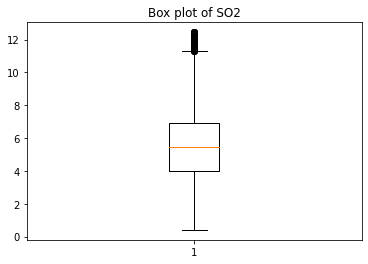

In [64]:
plt.boxplot(aqi['SO2'])
plt.title('Box plot of SO2')
plt.show()

In [65]:
##CHECKING OUTLIERS IN 'NH3'

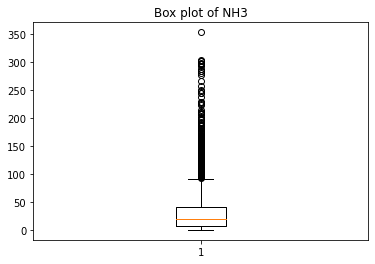

In [66]:
plt.boxplot(aqi['NH3'])
plt.title('Box plot of NH3')
plt.show()

In [67]:
Q1=np.percentile(aqi['NH3'],25,interpolation='midpoint')
Q2=np.percentile(aqi['NH3'],50,interpolation='midpoint')
Q3=np.percentile(aqi['NH3'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

print('The values below',low_lim,'and above',up_lim,'are outliers.')

The Q1 value: 6.4399999999999995
The Q2 value: 20.0
The Q3 value: 40.705
The values below -44.9575 and above 92.10249999999999 are outliers.


In [68]:
outlier=[]
for x in aqi["NH3"]:
    if x > up_lim or x < low_lim:
        outlier.append(x)

print('There are',len(outlier),'outliers in NH3 feature')
print('Outliers are:',outlier)

There are 254 outliers in NH3 feature
Outliers are: [104.81, 120.07, 94.19, 98.39, 142.84, 129.91, 186.57, 197.29, 176.1, 210.23, 124.02, 128.37, 148.89, 145.71, 135.17, 142.9, 130.64, 131.43, 141.84, 142.26, 172.14, 119.06, 113.53, 139.64, 180.77, 302.08, 147.67, 134.62, 122.67, 104.23, 102.37, 123.26, 209.8, 223.87, 352.89, 201.85, 236.87, 256.27, 275.78, 225.01, 123.82, 206.54, 283.67, 96.9, 98.22, 160.08, 181.86, 296.29, 173.32, 187.56, 121.14, 295.74, 227.92, 152.68, 186.53, 149.22, 128.27, 174.22, 169.19, 168.71, 129.87, 115.34, 136.56, 150.27, 139.37, 176.16, 173.87, 174.31, 181.06, 187.75, 214.6, 174.56, 165.18, 166.96, 148.68, 152.03, 149.99, 127.6, 160.27, 190.4, 175.4, 143.22, 116.99, 159.27, 142.42, 165.99, 174.44, 187.9, 112.54, 120.6, 185.85, 121.46, 101.61, 98.52, 120.11, 93.67, 106.31, 119.72, 94.34, 99.46, 131.28, 131.56, 132.82, 146.54, 114.48, 132.0, 119.3, 155.73, 165.16, 152.88, 166.02, 167.96, 164.84, 161.67, 115.39, 131.62, 129.39, 98.99, 125.62, 114.15, 110.92, 

In [69]:
ind1 = aqi['NH3'] > up_lim
NH3_index=aqi.loc[ind1].index

In [70]:
aqi.drop(NH3_index,inplace=True)

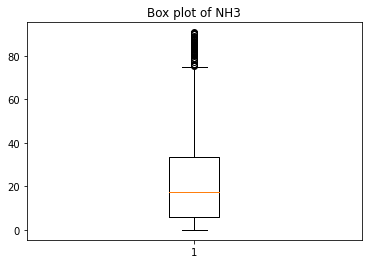

In [71]:
plt.boxplot(aqi['NH3'])
plt.title('Box plot of NH3')
plt.show()

In [72]:
aqi.shape

(3941, 12)

### Encoding

In [73]:
# label encoding categorical variable 'City'
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
aqi['City']=le.fit_transform(aqi['City'])
aqi

,City,Date,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
82,0,2015-03-24,60.47,77.485,5.39,29.87,20.88,35.10,1.46,6.07,64.12,119.0
84,0,2015-03-26,60.73,77.485,4.16,32.07,21.03,34.71,1.44,1.67,67.21,132.0
88,0,2015-03-30,30.78,77.485,2.68,16.23,14.63,26.96,1.46,2.63,49.52,80.0
89,0,2015-03-31,38.99,77.485,2.60,10.97,12.70,27.52,1.79,2.79,47.67,90.0
93,0,2015-04-04,36.68,77.485,3.63,12.89,10.88,40.71,1.47,3.29,76.36,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5673,4,2020-06-27,18.06,36.040,8.19,9.50,12.46,6.57,0.61,8.38,29.89,42.0
5674,4,2020-06-28,22.51,43.970,7.00,7.38,9.57,6.09,0.61,8.32,27.73,43.0
5675,4,2020-06-29,23.17,46.710,8.87,10.75,12.88,5.65,0.68,8.07,25.61,49.0
5676,4,2020-06-30,20.66,41.530,8.65,9.93,12.41,5.88,0.53,8.40,26.00,40.0


#### Note:  cities Bengaluru, Chennai,Coimbatore,Ernakulam,Thiruvanathapuram are label encoded as 0,1,2,3,4 respectively.

## *minmax scaling*

In [74]:
from sklearn import preprocessing

In [75]:
x = aqi.drop(['AQI','Date'],axis=1)

In [76]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x= min_max.fit_transform(x) #storing back to x
x=pd.DataFrame(x)

In [77]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,0.365326,0.116333,0.176091,0.349135,0.369445,0.343125,0.244583,0.458573,0.429786,0.288277
std,0.396073,0.075387,0.090665,0.209398,0.217389,0.226295,0.206724,0.206040,0.194335,0.147574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.064962,0.130728,0.166492,0.201376,0.157988,0.063952,0.353261,0.299252,0.176253
50%,0.250000,0.100271,0.144393,0.340838,0.323416,0.332966,0.193396,0.467391,0.417290,0.264749
75%,0.750000,0.148024,0.213436,0.487435,0.522162,0.500883,0.368189,0.570652,0.534497,0.382375
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalization

In [78]:
x = preprocessing.normalize(x)
x= pd.DataFrame(x)

In [79]:
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000,3941.000000
mean,0.290089,0.097128,0.146453,0.284424,0.303961,0.275627,0.211220,0.370485,0.351103,0.239840
std,0.307752,0.063721,0.071031,0.152212,0.167183,0.162900,0.182963,0.153746,0.140965,0.121036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.055008,0.100023,0.161644,0.173023,0.131713,0.049557,0.303178,0.257430,0.148837
50%,0.208985,0.083737,0.133736,0.296641,0.279765,0.282853,0.153862,0.379845,0.346263,0.225470
75%,0.585613,0.122138,0.178196,0.387045,0.429852,0.404772,0.315597,0.453334,0.440444,0.315510
max,0.981597,0.804818,0.694996,0.736410,0.784352,0.701803,0.789855,0.902890,0.757841,0.825885


## *Exploratory data analysis*

In [80]:
columns = aqi.columns
air_pollutants = aqi[columns[2:11]]
air_pollutants.head(0)  # extracting primary air pollutants.

,PM2_5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3


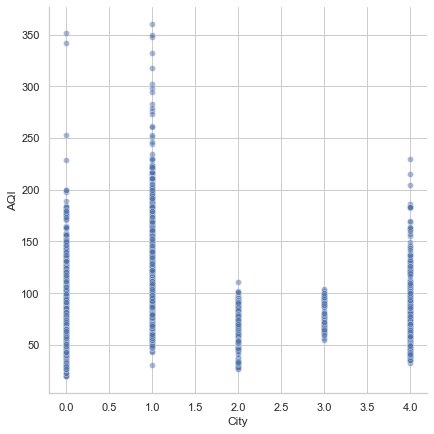

In [154]:
sns.set_theme(style="whitegrid")
sns.relplot(x="City", y="AQI",sizes=(40, 400), alpha=.5, palette="muted",height=6, data=aqi);

#### Insights: city 1(ie, chennai) is having high AQI value compared to other cities and city 2(Coimbatore) and 3 (ernakulam) have comparatively low AQI.

Text(0.5, 1.0, 'Plot of PM2_5 vs City')

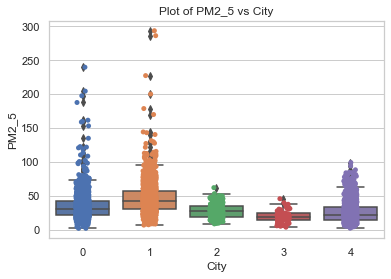

In [158]:
#plotting PM2_5 vs City
sns.stripplot(data=aqi,x=aqi['City'],y=aqi["PM2_5"]).set_title("Plot of PM2_5 vs City")
sns.boxplot(data=aqi,x=aqi['City'],y=aqi["PM2_5"]).set_title("Plot of PM2_5 vs City")

#### Insights: PM2_5 values is high for Chennai. the city contain more fine particulate matter than other cities and Ernakulam with least PM2_5.

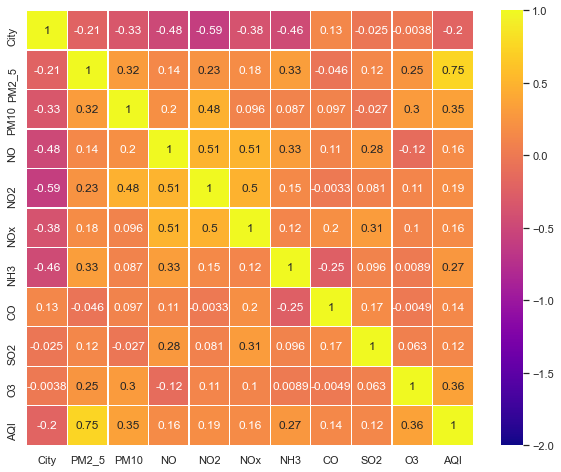

In [83]:
#feature reduction
corrmatrix = aqi.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,vmin=-2,vmax=1,annot=True, linewidths=0.2,cmap='plasma');

Most of the variables are highly correlated.

In [84]:
aqi.drop(['NO2','NO','NOx'] ,axis=1 ,inplace=True)  # dropping highly correlated NO2,NO,NOx

In [85]:
#splitting dataset into features and target
y = aqi['AQI']
x = aqi.drop(['AQI','Date'],axis=1)

In [86]:
x.shape

(3941, 7)

In [87]:
y.shape

(3941,)

Note: Now we can split data into test and train, then proceed with model buliding.

# Modelling

In [117]:
#splitting dataset into test and train.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.25)

## model 1 : Linear regression

In [120]:
from sklearn import linear_model
lr1 = linear_model.LinearRegression()
model = lr1.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error        # to calculate efficiency of our model.
from sklearn.metrics import r2_score
import math
print('MSE is :', mean_squared_error(y_test,y_pred))
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean square value is:",RMSE)

MSE is : 419.16928467892916
R2 value: 0.6407390921226622
Root Mean square value is: 20.473624121755513


In [121]:
#standardising features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
lr1 = linear_model.LinearRegression()
model = lr1.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error        # to calculate efficiency of our model.
from sklearn.metrics import r2_score
print('MSE is :', mean_squared_error(y_test,y_pred))
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 423.97883606545446
R2 value: 0.6366169298823414
Root Mean Square Error is: 20.59074636980055


In [122]:
#standardising make increase mse and decrease r2 values.

## model 2: Decision Tree Regressor

In [123]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
model=dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 760.8109153144017
R2 value: 0.3479254560166487
Root Mean Square Error is: 27.582801078106655


In [124]:
#standardising features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

dt_model = DecisionTreeRegressor()
model=dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 787.5383493914808
R2 value: 0.32501795161990343
Root Mean Square Error is: 28.063113679552394


In [125]:
# slight variation in mse and r2 value after standardisation.

## model 3: Support vector machine

In [126]:
#linear svm

In [127]:
from sklearn.svm import SVC

svm_linear = SVC(kernel ='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 547.4604462474645
R2 value: 0.5307835184144079
Root Mean Square Error is: 23.397872686367545


In [128]:
#standardising features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred = svm_linear.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 547.4604462474645
R2 value: 0.5307835184144079
Root Mean Square Error is: 23.397872686367545


In [129]:
#polynomial svm

In [130]:
svm_poly = SVC(kernel= 'poly', degree=3)
svm_poly.fit(x_train, y_train)
y_pred = svm_poly.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)


MSE is : 634.5872210953347
R2 value: 0.4561090482746265
Root Mean Square Error is: 25.191014689673274


In [131]:
#standardising features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

svm_poly = SVC(kernel= 'poly', degree=3)
svm_poly.fit(x_train, y_train)
y_pred = svm_poly.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 634.5872210953347
R2 value: 0.4561090482746265
Root Mean Square Error is: 25.191014689673274


In [132]:
# rbf svm

In [133]:
svm_rad = SVC(kernel='rbf')
svm_rad.fit(x_train, y_train)
y_pred = svm_rad.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 708.1146044624746
R2 value: 0.39309032178907966
Root Mean Square Error is: 26.6104228538833


In [134]:
#standardising features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

svm_rad = SVC(kernel='rbf')
svm_rad.fit(x_train, y_train)
y_pred = svm_rad.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 708.1146044624746
R2 value: 0.39309032178907966
Root Mean Square Error is: 26.6104228538833


In [135]:
# no change in mse and r2 value after standardising.

## model 4: Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 336.9604998320063
R2 value: 0.711198459636245
Root Mean Square Error is: 18.356483863529157


In [137]:
#standardising features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 341.5553846887678
R2 value: 0.7072602834254178
Root Mean Square Error is: 18.481217078124693


In [138]:
# slight variation after standardisation.

In [139]:
# xgboost regressor
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 391.8072330755053
R2 value: 0.6641905134451053
Root Mean Square Error is: 19.79412117461913


### Model evaluation

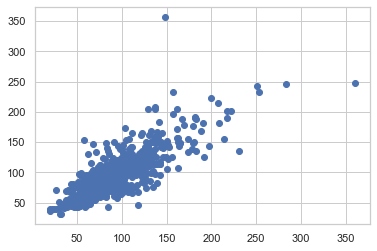

In [140]:
plt.scatter(y_test,y_pred);

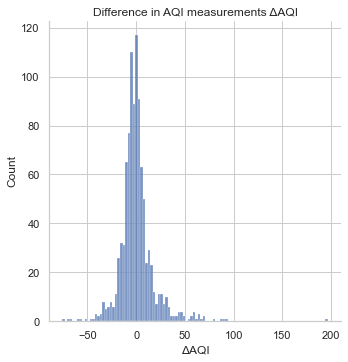

In [153]:
sns.displot(y_test-y_pred)
plt.title("Difference in AQI measurements \u0394AQI")
plt.xlabel("\u0394AQI")
plt.ylabel("Count");

In [143]:
data = {'MSE Value':[419.17,792.71,344.02,547.46,391.80],
       'R2 score':[0.640,0.354,0.705,0.530,0.664],
       'RMSE value':[20.47,27.58,18.48,23.39,19.79]}
 
# Creating pandas DataFrame.
df = pd.DataFrame(data, index =['Linear Regression',
                                'Decision tree',
                                'Random Forest regressor',
                                'Linear SVM','XGboost'])
 
# printing the data
df

,MSE Value,R2 score,RMSE value
Linear Regression,419.17,0.640,20.47
Decision tree,792.71,0.354,27.58
Random Forest regressor,344.02,0.705,18.48
Linear SVM,547.46,0.530,23.39
XGboost,391.80,0.664,19.79


#### Findings : 
Random forest regressor model have relatively high R-sqr value with RMSE value of 18.48. MSE values are very high for all models. There may be some bias/variation in data since this is a time series data.

# Fine Tuning 

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [114]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [115]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [144]:
# Using the random grid searching for best hyperparameters
# creating the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2)
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=900; total time=   2.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=100

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [146]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [147]:
rf_random.best_score_

-381.4937930264806

In [148]:
y_pred=rf_random.predict(x_test)

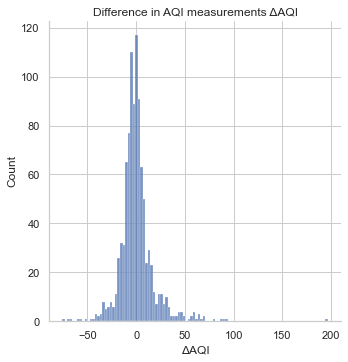

In [152]:
sns.displot(y_test-y_pred)
plt.title("Difference in AQI measurements \u0394AQI")
plt.xlabel("\u0394AQI")
plt.ylabel("Count");

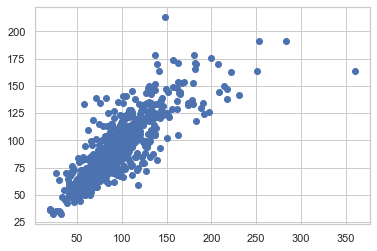

In [150]:
plt.scatter(y_test,y_pred);

In [159]:
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('R2 value:', r2_score(y_test,y_pred))
RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Square Error is:",RMSE)

MSE is : 323.61563855537776
R2 value: 0.722636050969806
Root Mean Square Error is: 17.989320124879033


### Inference:
Concerning the modelling, it can be considered as an exercise to find accuracy of comparison of AQI. however , since accuracy values are not high, it cannot be applied for predictive model.

GROUP -3 (DSA-B3)